## testing pacman stuff.

In [7]:
from fastai.tabular import * 
x = np.arange(36)
df = pd.read_csv('data/trainingData.csv',sep=';')
df = df.drop(['AA','BB','CC','DD','EE','FF','GG','HH','II','JJ','KK'], axis=1)
#df = df.drop(['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','X','Y','Z','HH','KK'], axis=1)
df.head(5)

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,X,Y,Z
0,LEFT,0,0,978,3,0,0,0,220,4,...,-1,-1,-1,RIGHT,RIGHT,RIGHT,RIGHT,1293,220,4
1,LEFT,0,0,977,3,0,1,1,220,4,...,-1,-1,-1,RIGHT,RIGHT,RIGHT,RIGHT,1293,220,4
2,LEFT,0,0,976,3,0,2,2,220,4,...,-1,-1,-1,RIGHT,RIGHT,RIGHT,RIGHT,1293,220,4
3,LEFT,0,0,975,3,0,3,3,220,4,...,-1,-1,-1,RIGHT,RIGHT,RIGHT,RIGHT,1293,220,4
4,LEFT,0,0,974,3,0,4,4,220,4,...,-1,-1,-1,RIGHT,RIGHT,RIGHT,RIGHT,1293,220,4


In [8]:
procs = [FillMissing, Categorify, Normalize]
#valid_idx = range(len(df)-2000, len(df))
valid_idx = list(np.random.randint(0,len(df),int(len(df)*0.1)))
dep_var = 'A'
cat_names = ['J', 'K', 'L', 'M', 'N','S','T','U','V','Z']

In [9]:
data = TabularDataBunch.from_df('path', df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)
print("cont columns")
print(data.train_ds.cont_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}
print("cat columns")
print(data.train_ds.cat_names)

cont columns
['Q', 'O', 'G', 'P', 'H', 'E', 'Y', 'D', 'B', 'X', 'C', 'R', 'I', 'F']
cat columns
['J', 'K', 'L', 'M', 'N', 'S', 'T', 'U', 'V', 'Z']


epoch,train_loss,valid_loss,accuracy,time
1,1.062537,1.018641,0.597808,00:04
2,0.993653,0.961157,0.620822,00:04
3,0.935205,0.926128,0.647123,00:04
4,0.917695,0.920527,0.626849,00:04
5,0.895246,0.865977,0.656986,00:04
6,0.875402,0.883144,0.642740,00:04
7,0.873108,0.863469,0.647123,00:04
8,0.844802,0.849790,0.660274,00:04
9,0.854352,0.848854,0.656986,00:04
10,0.827738,0.847703,0.659178,00:04


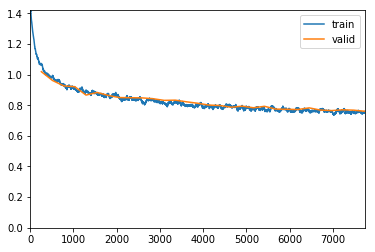

CPU times: user 1min 52s, sys: 8.88 s, total: 2min 1s
Wall time: 2min 13s


In [10]:
learn = tabular_learner(data, layers=[30,30], metrics=accuracy,callback_fns=ShowGraph)
#%time learn.fit_one_cycle(20)
%time learn.fit(30)

In [100]:
learn.predict(df.iloc[100])

(Category UP, tensor(3), tensor([0.0657, 0.0237, 0.2787, 0.6320]))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


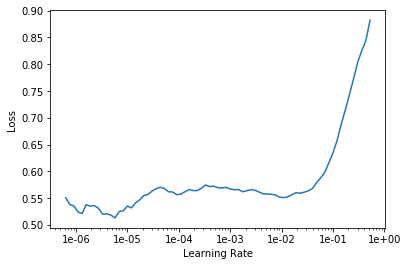

In [94]:
learn.lr_find()
learn.recorder.plot()

In [115]:
?learn.lr_find()

Object `learn.lr_find()` not found.
